# Доп. задачи анализа данных
## Задание 3.2


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* При решении без доказательства можно пользоваться любыми теоретическими свойствами, которые были на лекциях или семинарах.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2 - 5 баллов
* Задача 3 - 10 баллов

## Задача 1

Пусть $\widehat{\theta}$ &mdash; оценка коэффициентов линейной модели в методе ридж-регрессии.
* Посчитайте $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^T\left(\widehat{\theta} - \theta\right)$.
* Покажите, что в отличии от МНК вектор оценок отклика $\widehat{Y}$ на обучающей выборке в методе ридж-регрессии не перпендикулярен остаткам модели $\widehat{e} = Y  - \widehat{Y}$.

**Решение.** pdf с решением отправлен боту вместе с этим ноутбуком.

## Задача 2

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для случая ридж-регрессии. Какой вы можете видеть эффект при изменении параметра регуляризации и в чем его отличие от лассо-регрессии?

**Решение.** pdf с решением отправлен боту вместе с этим ноутбуком.

## Задача 3

Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [1]:
import pandas as pd

data = pd.read_csv(
    '/home/topcoder2k/ds-intro/data/raw/MatStat/cost-of-living-2018.txt',
    sep='\t'
)
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]
data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [2]:
X = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index'
]]
y = data['Groceries Index']

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ.** Во-первых, разные признаки могут иметь разные масштабы значений (например, для описания большого города можно использовать среднюю зп, которая будет тысяч 40, и размер населения, которое может быть несколько миллионов). Тогда при подсчёте метрик (например, Евклидовой) признаки с бОльшими значениями будут влиять на значения метрики больше, тем самым заставляя модель подстраиваться под эти признаки лучше, чем под другие.

Во-вторых, градиентный спуск гораздо сходится быстрее при нормализованных данных.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [5]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set('notebook', font_scale=1.7)
%matplotlib inline

def draw_track(model, X, y, log_min, log_max, num, is_l1_ratio=False,
               title='', figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param is_l1_ratio: костыль для тестирования также l1_ration в случае
        elastic_net
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num) 
    if is_l1_ratio:
        alphas = np.linspace(log_min, log_max, num)
        
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            if is_l1_ratio == False:
                # равномерно распределим alpha по обоим коэффициентам
                a *= 3/2
                model.set_params(alpha=a)
            else:
                model.set_params(l1_ratio=a)
        else:
            model.set_params(alpha=a)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    if not is_l1_ratio:
        ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    if is_l1_ratio == False:
        ax.set_xscale('log')
        plt.xlabel('alpha', fontsize=19)
    else:
        plt.xlabel('l1_ratio', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='best', fontsize=15)
    plt.axis('tight')
    plt.show()

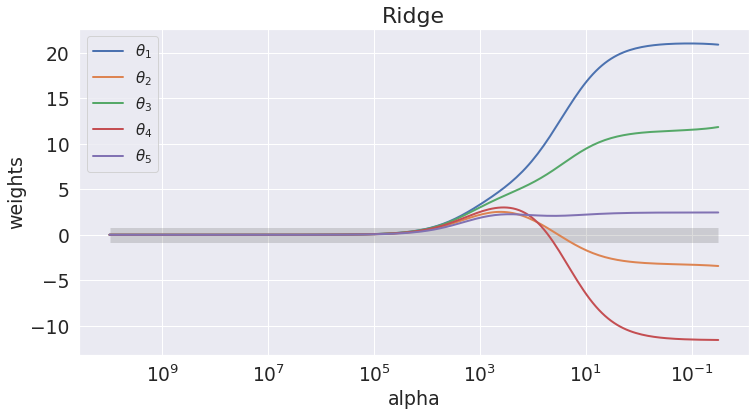

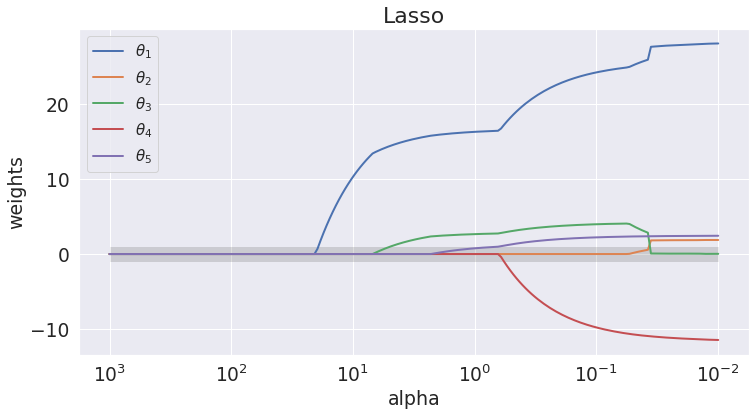

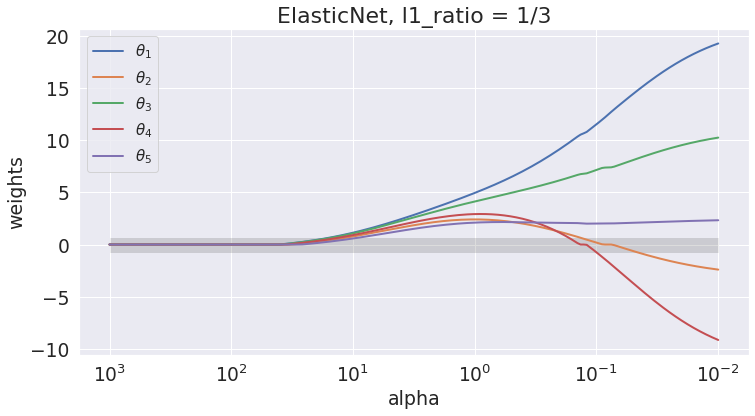

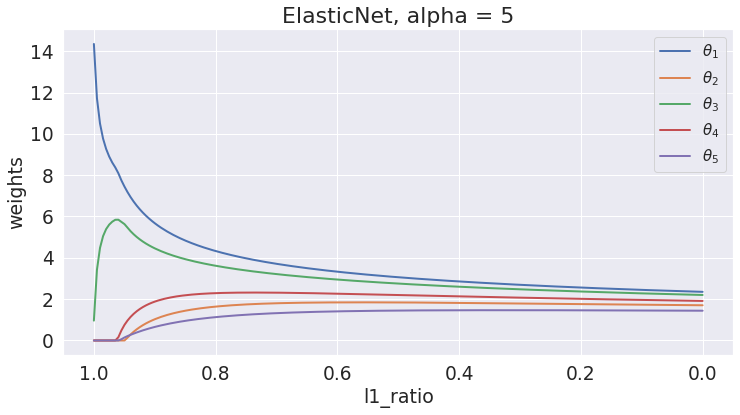

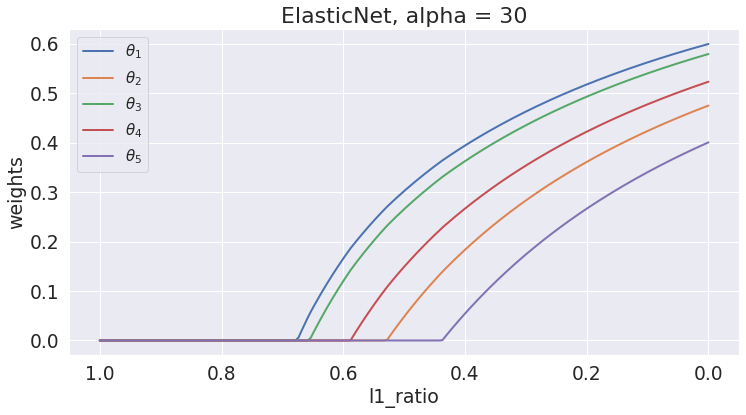

In [88]:
draw_track(Ridge(fit_intercept=False), X, y, -1.5, 10, 200, 
           title='Ridge')
draw_track(Lasso(fit_intercept=False), X, y, -2, 3, 200, 
           title='Lasso')
draw_track(ElasticNet(fit_intercept=False, l1_ratio=1/3), X, y, -2, 3, 200, 
           title='ElasticNet, l1_ratio = 1/3')
draw_track(ElasticNet(fit_intercept=False, alpha=5), X, y, 0, 1, 200,
           is_l1_ratio=True, title='ElasticNet, alpha = 5')
draw_track(ElasticNet(fit_intercept=False, alpha=30), X, y, 0, 1, 200,
           is_l1_ratio=True, title='ElasticNet, alpha = 30')

Расчитайте индекс обусловленности для случая линейной регрессии. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [6]:
from numpy.linalg import eig

w, v = eig(X_train_scaled.T @ X_train_scaled)
print((w.max() / w.min())**0.5)

13000.16456301713


**Вывод.** Индекс обусловленности матрицы $X^T X$ очень большой. Скорее всего, есть мультиколлинеарность.

**3.** С помощью кросс-валидации определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой.

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def find_best_params(params_grid, model):
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

    gs = GridSearchCV(
        estimator=model,
        param_grid=params_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=ss,
        verbose=10,
        error_score='raise'
    )
    
    # Заметим, что стандартизация над этими данными не проводилась.
    # я не нашёл метода, который позволил бы внутри валидации проводить стандартизацию.
    # Но значения несильно отличаются масштабами и разбросами значений, так что ничего страшного.
    gs.fit(X_train, y_train)
    
    print(gs.best_score_)
    return gs.best_params_, gs.best_estimator_

# Для ридж-регрессии
params_grid = {
    'alpha' : np.linspace(0.0001, 1000, num=100)
}
model = Ridge()
best_params, best_ridge = find_best_params(params_grid, model)
print(best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1940s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0411s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0476s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1330s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1813s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    4.1s
[Parallel(n

-35.094157939849396
{'alpha': 10.101109090909091}


[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished


In [8]:
# Так как около 10 наилучший, проведём там исследования получше
params_grid = {
    'alpha' : np.linspace(0.0001, 11, num=200)
}
best_params, best_ridge = find_best_params(params_grid, model)
print(best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0213s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0461s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1661s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1776s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:    3.0s


-35.080483243257135
{'alpha': 0.33175527638190955}


[Parallel(n_jobs=-1)]: Done 973 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


In [9]:
# Аналогично для лассо-регрессии, но тут уже сразу можно ограничиться ~10,
# так как из графиков видно, что почти все коэф-ты зануляются при 10
params_grid = {
    'alpha' : np.linspace(0.0001, 11, num=200)
}
model = Lasso()
best_params, best_lasso = find_best_params(params_grid, model)
print(best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1602s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0809s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0695s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1186s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 973 tasks      | el

-35.08149508714297
{'alpha': 0.0001}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


In [10]:
# Аналогично для лассо-регрессии, но тут уже сразу можно ограничиться ~10,
# так как из графиков видно, что почти все коэф-ты зануляются при 10
params_grid = {
    'alpha' : np.linspace(0.0001, 30, num=20),
    'l1_ratio' : np.linspace(0.0001, 1, num=10)
}
model = ElasticNet()
best_params, best_elastic = find_best_params(params_grid, model)
print(best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0402s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0576s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0971s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1362s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:    2.9s


-35.08149508714297
{'alpha': 0.0001, 'l1_ratio': 1.0}


[Parallel(n_jobs=-1)]: Done 973 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


In [11]:
# рассмотрим поточнее
params_grid = {
    'alpha' : np.linspace(0.0001, 1, num=20),
    'l1_ratio' : np.linspace(0.9, 1, num=10)
}
model = ElasticNet()
best_params, best_elastic = find_best_params(params_grid, model)
print(best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0251s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0537s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1034s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1428s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    3.1s


-35.08149508714297
{'alpha': 0.0001, 'l1_ratio': 1.0}


[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 973 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.5s finished


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [12]:
y_predicted = best_ridge.predict(X_test)
score = ((y_test - y_predicted)**2).mean()
print("Лучшая ридж-регресия даёт значение MSE: {0:.4f}".format(score))
y_predicted = best_lasso.predict(X_test)
score = ((y_test - y_predicted)**2).mean()
print("Лучшая лассо-регресия даёт значение MSE: {0:.4f}".format(score))
y_predicted = best_elastic.predict(X_test)
score = ((y_test - y_predicted)**2).mean()
print("Лучшая эластикнет-регресия даёт значение MSE: {0:.4f}".format(score))

Лучшая ридж-регресия даёт значение MSE: 33.4749
Лучшая лассо-регресия даёт значение MSE: 33.4712
Лучшая эластикнет-регресия даёт значение MSE: 33.4712


**4.** Исследуйте остатки модели Ridge-регрессии. Можно ли говорить о гомоскедастичности. Если нет, попытайтесь несложными преобразованиями признаков и отклика визуально прийти к гомоскедастичности.

Text(0, 0.5, '$\\widehat{e_i}$')

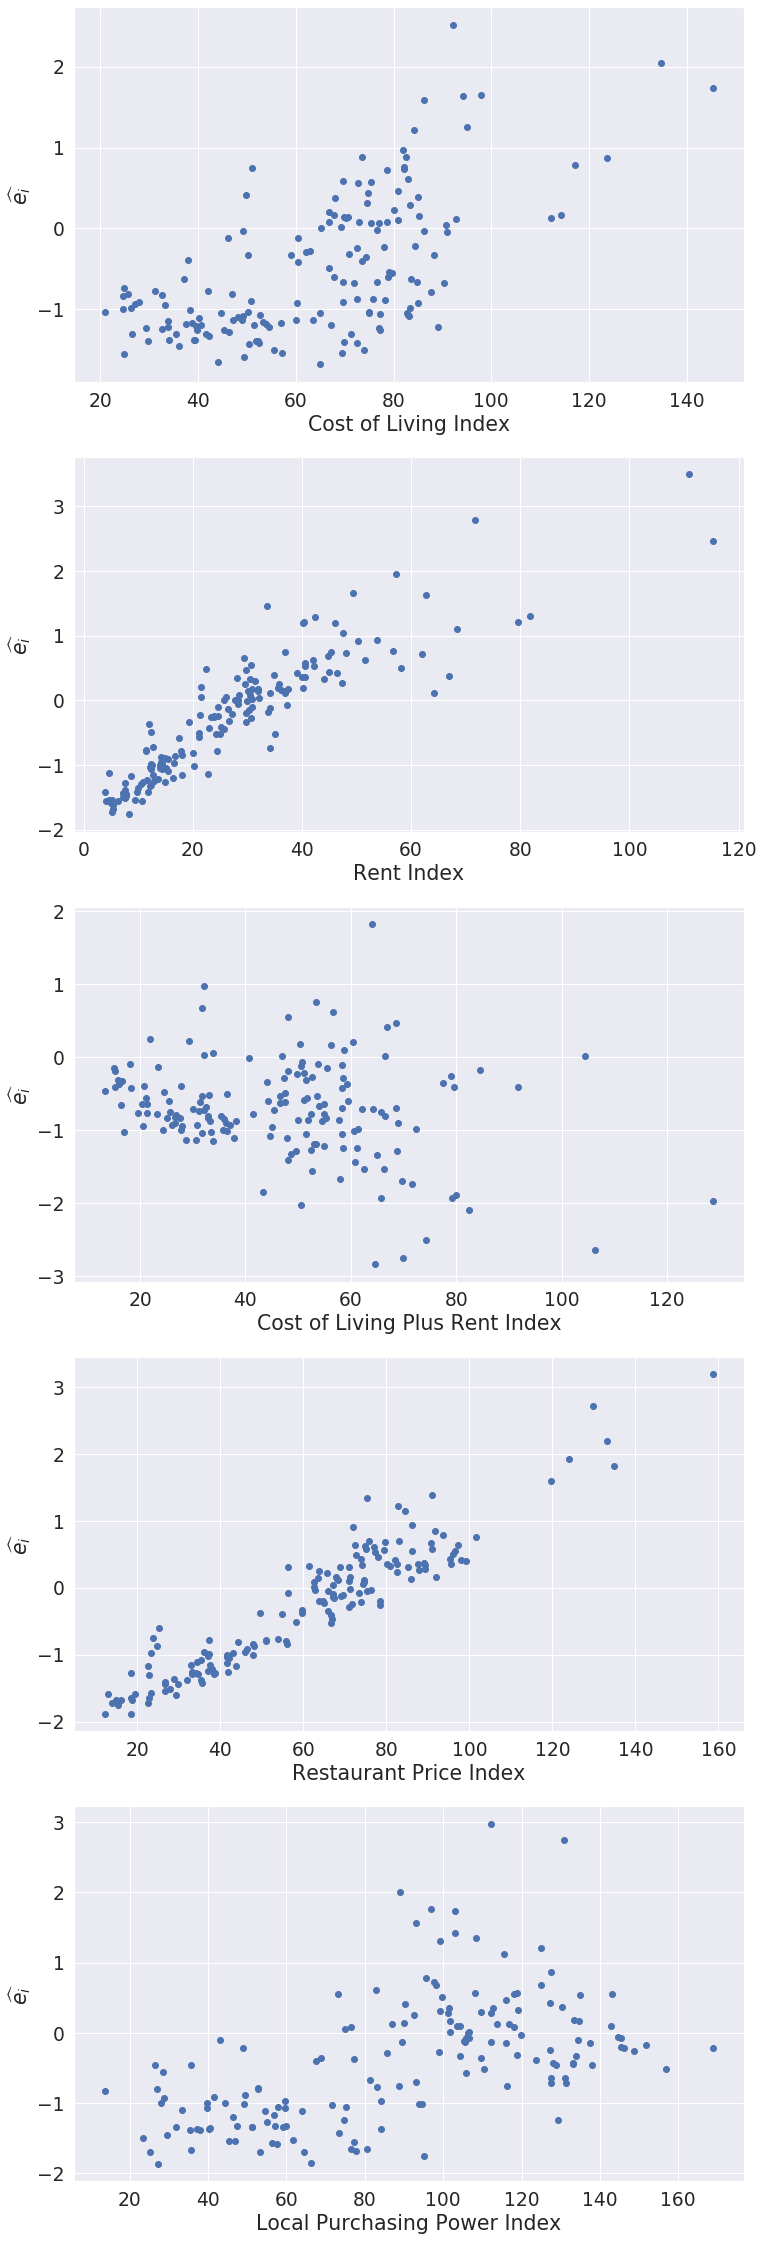

In [17]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(12, 8 * 5))
# fig.suptitle('Зависимости остатков от каждого из признаков')

# Идём по каждому из признаков, строим предсказания в зависимости от одного
# при фиксированных остальных (простите, в цикле не получилось).
data_length = X_test.shape[0]
X_for_predict = np.array([
    X_test.iloc[:, 0],
    [X_test.iloc[0][1]] * data_length,
    [X_test.iloc[0][2]] * data_length,
    [X_test.iloc[0][3]] * data_length,
    [X_test.iloc[0][4]] * data_length,
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
# Используем стандартизированные остатки, так как n >> d
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
axes[0].scatter(X_test.iloc[:, 0], widehat_e)
axes[0].set_xlabel("{0:}".format(X_test.columns[0]))
axes[0].set_ylabel(r"$\widehat{e_i}$")

X_for_predict = np.array([
    [X_test.iloc[0][0]] * data_length,
    X_test.iloc[:, 1],
    [X_test.iloc[0][2]] * data_length,
    [X_test.iloc[0][3]] * data_length,
    [X_test.iloc[0][4]] * data_length,
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
axes[1].scatter(X_test.iloc[:, 1], widehat_e)
axes[1].set_xlabel("{0:}".format(X_test.columns[1]))
axes[1].set_ylabel(r"$\widehat{e_i}$")

X_for_predict = np.array([
    [X_test.iloc[0][0]] * data_length,
    [X_test.iloc[0][1]] * data_length,
    X_test.iloc[:, 2],
    [X_test.iloc[0][3]] * data_length,
    [X_test.iloc[0][4]] * data_length,
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
axes[2].scatter(X_test.iloc[:, 2], widehat_e)
axes[2].set_xlabel("{0:}".format(X_test.columns[2]))
axes[2].set_ylabel(r"$\widehat{e_i}$")

X_for_predict = np.array([
    [X_test.iloc[0][0]] * data_length,
    [X_test.iloc[0][1]] * data_length,
    [X_test.iloc[0][2]] * data_length,
    X_test.iloc[:, 3],
    [X_test.iloc[0][4]] * data_length,
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
axes[3].scatter(X_test.iloc[:, 3], widehat_e)
axes[3].set_xlabel("{0:}".format(X_test.columns[3]))
axes[3].set_ylabel(r"$\widehat{e_i}$")

X_for_predict = np.array([
    [X_test.iloc[0][0]] * data_length,
    [X_test.iloc[0][1]] * data_length,
    [X_test.iloc[0][2]] * data_length,
    [X_test.iloc[0][3]] * data_length,
    X_test.iloc[:, 4]
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
axes[4].scatter(X_test.iloc[:, 4], widehat_e)
axes[4].set_xlabel("{0:}".format(X_test.columns[4]))
axes[4].set_ylabel(r"$\widehat{e_i}$")

**Вывод.** Похоже, что есть гетероскедастичность, так как для признаков ```Rent Index, Restaurant Price Index``` можно заметить, как при увеличении значений признака увеличивается разброс показаний. Но какие преобразования стоит использовать --- из рисунков непонятно. На лекции предалагли прологарифмировать.

Text(0, 0.5, '$\\widehat{e_i}$')

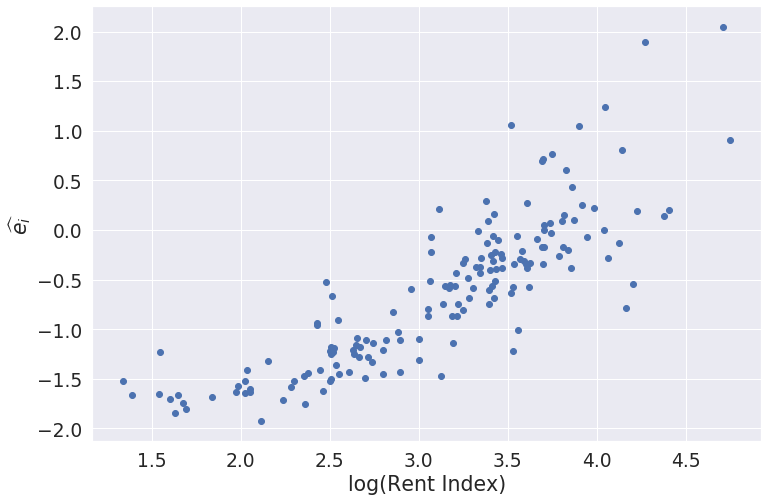

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 8))

X_for_predict = np.array([
    [X_test.iloc[0][0]] * data_length,
    np.log(X_test.iloc[:, 1]),
    [X_test.iloc[0][2]] * data_length,
    [X_test.iloc[0][3]] * data_length,
    [X_test.iloc[0][4]] * data_length,
]).T
widehat_e = y_test - best_ridge.predict(X_for_predict)
widehat_e = widehat_e / (np.dot(widehat_e, widehat_e) / (data_length - 5))**0.5
ax.scatter(np.log(X_test.iloc[:, 1]), widehat_e)
ax.set_xlabel("log({0:})".format(X_test.columns[1]))
ax.set_ylabel(r"$\widehat{e_i}$")

**Вывод.** Нууууууу, я бы не сказал, что это помогло избавиться от гетероскедастичности, так всё равно заметно увеличение разброса значений. Так как природа процесса нам неизвестна, нормализовать тоже не получится, так что ¯\\_(ツ)_/¯.

С помощью модели Ridge-регрессии постройте предсказательный интревал для наблюдаемого отклика уровня доверия $0.95$. Какой смысл имеет этот интервал? В чем его отличие от доверительного интервала? Посчитате долю точек выходящих за предсказательный интревал.

In [197]:
# Так как в sklearn нет возможности его получить, надо харкодить...
from scipy.stats import t

y_predicted = best_ridge.predict(X_test)
differ = np.array([])
alpha = 0.95
n = X_test.shape[0]
d = X_test.shape[1]
t_quantile = t(df = n - d - 1).ppf(1 - alpha / 2)
sigma = np.linalg.norm(y_test - y_predicted)**2 / (n - d) # вообще говоря, эта оценка верна для МНК...

for i in range(X_test_scaled.shape[0]):
    x_new = X_test.iloc[i]
    differ = np.insert(
        differ,
        differ.size,
        t_quantile * sigma *\
        (1 + np.dot(x_new, np.linalg.inv(np.array(X_test.T @ X_test)) @ x_new))**0.5
    )

upr_y = y_predicted + differ
lwr_y = y_predicted - differ

pd.DataFrame({'lwr': lwr_y, 'y_pred': y_predicted, 'upr': upr_y})

,lwr,y_pred,upr
0,67.998486,70.187501,72.376515
1,77.879453,80.065559,82.251665
2,22.583682,24.774581,26.965480
3,80.555558,82.741986,84.928415
4,26.268530,28.449459,30.630387
...,...,...,...
157,64.581540,66.803403,69.025266
158,52.484647,54.721636,56.958626
159,41.424382,43.617338,45.810294
160,92.872101,95.107593,97.343084


**Ответ.** Предсказательный интервал является интервалом, в котором с большой вероятностью лежит само значение отклика (т. е. с учётом того, что в его значениях есть случайный шум).

**5.** Сделайте общий вывод по задаче.

**Вывод.**

1) Всегда нужно помнить про стандартизацию (в том числе при валидации).

2) Полезно строить графики зависимости коэффициентов от гиперпараметров, чтобы лучше оценивать диапазон для перебора значений в ```GridSearchCV```.